In [1]:
# Decision Tree Classifier - SpaceX Capstone Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Importar nuestro script de preprocesamiento
import sys, os
sys.path.append(os.path.abspath(".."))  # asegurar que Jupyter encuentre la carpeta scripts

from scripts.preprocessing import load_and_preprocess

# Cargar datos y preprocessor
X_train, X_test, y_train, y_test, preprocessor = load_and_preprocess()


In [3]:
# Definir pipeline: preprocesamiento + modelo Decision Tree
clf_tree = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])


In [4]:
# Entrenar el árbol de decisión con los datos de entrenamiento
clf_tree.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [5]:
# Hacer predicciones en el conjunto de test
y_pred_tree = clf_tree.predict(X_test)


Accuracy: 0.7435897435897436

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.82      0.82      0.82        28

    accuracy                           0.74        39
   macro avg       0.68      0.68      0.68        39
weighted avg       0.74      0.74      0.74        39



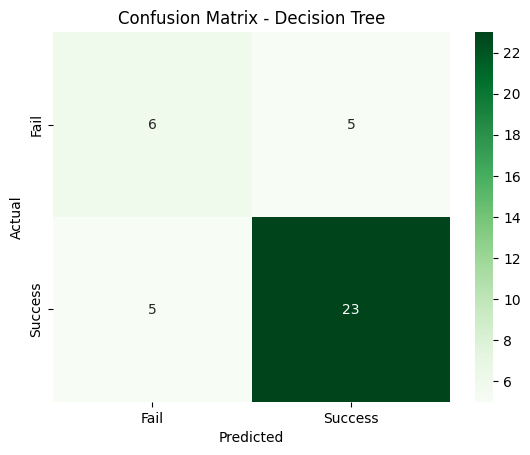

In [6]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_tree))

# Classification report (precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

# Matriz de confusión
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Fail", "Success"],
            yticklabels=["Fail", "Success"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Definimos el modelo base
# tree_model = Pipeline(steps=[
#     ("preprocessor", preprocessor),
#     ("classifier", DecisionTreeClassifier(random_state=42))
# ])

# # Hiperparámetros a probar
# param_grid = {
#     "classifier__max_depth": [3, 5, 7, None],
#     "classifier__min_samples_split": [2, 5, 10],
#     "classifier__min_samples_leaf": [1, 2, 4],
#     "classifier__criterion": ["gini", "entropy"]
# }

# # GridSearch con validación cruzada
# grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring="accuracy")

# # Entrenar
# grid_search.fit(X_train, y_train)

# # Resultados
# print("Mejores hiperparámetros:", grid_search.best_params_)
# print("Mejor accuracy en validación:", grid_search.best_score_)


Mejores hiperparámetros: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Mejor accuracy en validación: 0.807258064516129


Accuracy (mejor árbol en test): 0.7435897435897436

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.82      0.82      0.82        28

    accuracy                           0.74        39
   macro avg       0.68      0.68      0.68        39
weighted avg       0.74      0.74      0.74        39



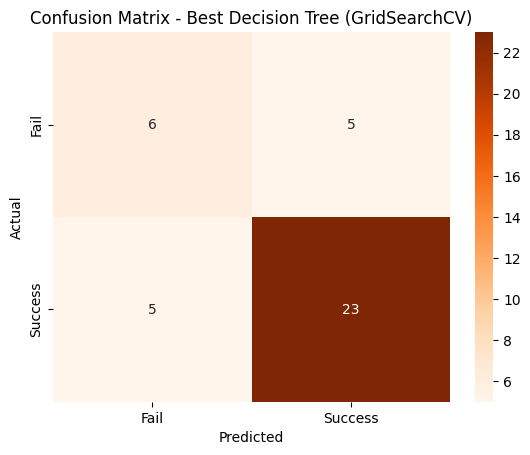

In [ ]:
# # Mejor modelo encontrado por GridSearch
# best_tree = grid_search.best_estimator_

# # Predicciones en test
# y_pred_best = best_tree.predict(X_test)

# # Evaluación
# print("Accuracy (mejor árbol en test):", accuracy_score(y_test, y_pred_best))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# # Matriz de confusión
# cm_best = confusion_matrix(y_test, y_pred_best)
# sns.heatmap(cm_best, annot=True, fmt="d", cmap="Oranges",
#             xticklabels=["Fail", "Success"],
#             yticklabels=["Fail", "Success"])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix - Best Decision Tree (GridSearchCV)")
# plt.show()
